## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Name: Zach Zazueta
<br>
Pace: Part time
<br>
Project review date/time: August 29th, 2019 @ 5:30pm EST
<br>
Instructor: Abhineet Kulkarni
<br>
Blog post URL: Will add this asap

In [1]:
# Your code here - remember to use markdown cells for comments as well!

# General Approach for Project 1

My plan for the project was to follow the Data Science cycle learned in Mod 1. I knew there would be a need to clean the data and that I would start to lean more about the impact of the independent variables on price. The following the cleaning process, some initial visualizations gave me a better understanding of what variables I would be able to include for my final regression model. After building that out, I was able to understand the regression equation and translate it back to the data. The final step was returning to the initial data set and pulling out some insights for the presentation.

(this writeup was completed after all code had been written)

# Business Understanding

I will be working with a set of data that includes a number of home sale prices and other information about those homes from King County in Washington state. The homes sold between May '14 and May '15. I will be determining some of the features of these homes that are most influential on sell price, and presenting these findings to a group of real estate investors.

# Data Mining

Importing my necessary libraries and collecting the data set provided.

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

plt.style.use('seaborn-pastel')
sns.set_context('notebook')

In [3]:
df = pd.read_csv('kc_house_data.csv')
df.head(10)

id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014   221900.0         3       1.00         1180   
1  6414100192   12/9/2014   538000.0         3       2.25         2570   
2  5631500400   2/25/2015   180000.0         2       1.00          770   
3  2487200875   12/9/2014   604000.0         4       3.00         1960   
4  1954400510   2/18/2015   510000.0         3       2.00         1680   
5  7237550310   5/12/2014  1230000.0         4       4.50         5420   
6  1321400060   6/27/2014   257500.0         3       2.25         1715   
7  2008000270   1/15/2015   291850.0         3       1.50         1060   
8  2414600126   4/15/2015   229500.0         3       1.00         1780   
9  3793500160   3/12/2015   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0         NaN   0.0     ...          7        1180   
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   
5    101930     1.0         0.0   0.0     ...         11        3890   
6      6819     2.0         0.0   0.0     ...          7        1715   
7      9711     1.0         0.0   NaN     ...          7        1060   
8      7470     1.0         0.0   0.0     ...          7        1050   
9      6560     2.0         0.0   0.0     ...          7        1890   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   
5         1530.0     2001           0.0    98053  47.6561 -122.005   
6              ?     1995           0.0    98003  47.3097 -122.327   
7            0.0     1963           0.0    98198  47.4095 -122.315   
8          730.0     1960           0.0    98146  47.5123 -122.337   
9            0.0     2003           0.0    98038  47.3684 -122.031   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  
5           4760      101930  
6           2238        6819  
7           1650        9711  
8           1780        8113  
9           2390        7570  

[10 rows x 21 columns]

# Data Exploration and Cleaning

Following our inital look at the data set, we need to clean it

In [4]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

My observations for the summary:
1. There are 21,597 initial rows (pre-cleaning) - I'll want to be sure to check for duplicate home ids.
2. There are mostly continuous variables, with a few that are potentially categorical.
3. Looking at max values and standard deviations, there are a fair number of outliers in the data set that will need to be removed.
4. I should likely investigate the scale that is being used for grade, as the values appear to range from 3-13.
5. Clarifying question - should sqft_above and sqft_basement sum to sqft_livingsquare? Assumption is yes.
6. Yr_renovated seems to contain both many zero values. 
7. A quick comparison of the first 10 rows of data show that sqft_living15 can be different than sqft_living (which suggests a renovation has occurred), even when yr_renovated is 0.0. This column seems problematic.
8. Zipcode should likely act as a categorical variable
9. I will likely use lat or long for map viz.

In [5]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n') 
    # this is to check for equal distribution of independent variable outputs

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/26/2014    0.006066
6/25/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

Quick notes:
- There are a few standard size lots (4- , 5-, & 6000)
- Few homes have 2.5 floors
- Less than 1% of homes have waterfront
- 90% of homes have not been viewed
- Only 1% of homes are a 1 or 2 for condition, the rest are 3+
- 60% of homes don't have a basement - that seems high. 2% of homes have '?' entered for basement sqft
- 96% of homes have 0 entered for yr_renovated - that would have to denote Not Renovated

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Observations for data:
1. Date should be converted to a date-time object.
2. sqft_basement should be converted to an integer.

In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
df.yr_renovated.isna().sum()/len(df.yr_renovated)

0.17789507802009538

Observations for missing data:
1. Waterfront - this would be a difficult one to clean, as it is a yes or no question "Does the property have views of the waterfront?". The answer to that question would likely have major impact on a home value in the real-world (Location, location, location!), so I would steer away from a median replacement. I will likely fill NaN values with a '2', creating a third category ('data unavailable'). Another approach could be to group homes by zipcode and do a proportional replacement.
2. I will drop the 63 NaNs for view - the loss of 63 rows will not impact outcome.
3. I will drop the yr_renovated column - 17% have null values, and it seems like renovations could have been made to homes that are not captured with a year. I've determined this by noticing sqft_living15 is larger than sqft_living, which signals a renovation, but yr_renovated is marked as 0.

In [9]:
df = df.drop('yr_renovated', axis=1) #drop yr_renovated

In [10]:
df.waterfront = df.waterfront.fillna(value=2) #create a third 'missing values' category (2) for waterfront
df.waterfront = df.waterfront.astype('category') #set waterfront to be category type

In [11]:
df = df.dropna() #drop the 63 rows with missing value for view
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Observations:
Null values have been dealt with. I now need to adjust my data types accordingly.

In [12]:
df.date = pd.to_datetime(df.date, infer_datetime_format=True) #date to datetime
df['month'] = df.date.map(lambda x: x.month) # add column for month to trend price over time of year

In [13]:
df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = df['sqft_living'] - df['sqft_above']
#this does a quick replacement to determine the total living space and the sq footage of the basement
df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int)

In [14]:
df.zipcode.nunique() # housing is split across 70 unique zip codes

70

In [15]:
df.zipcode = df.zipcode.astype('category') 
#I'm doing this because continuous designation of zipcode does not represent a quality of the area.

In [16]:
df = df.convert_objects(convert_numeric=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null datetime64[ns]
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null category
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null int32
yr_built         21534 non-null int64
zipcode          21534 non-null category
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
month            21534 non-null int64
dtypes: category(2), datetime64[ns](1), float64(6), int32(1), int6

C:\Users\zazue\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


I am nearly done with cleaning, just need to check for duplicates and remove outliers.

In [17]:
#duplicates becomes the data set that contains all 177 homes, and all occurrances of them selling 
#353 occurances for 177 homes
id_duplicates = df.loc[df.id.duplicated(keep=False),:]
print(len(df.loc[df.id.duplicated(), :]))
print(len(id_duplicates))
id_duplicates.sort_values('id').head()

177
353


id       date     price  bedrooms  bathrooms  sqft_living  \
2495     1000102 2015-04-22  300000.0         6       3.00         2400   
2494     1000102 2014-09-16  280000.0         6       3.00         2400   
16800    7200179 2014-10-16  150000.0         2       1.00          840   
16801    7200179 2015-04-24  175000.0         2       1.00          840   
11422  109200390 2014-10-20  250000.0         3       1.75         1480   

       sqft_lot  floors waterfront  view  ...    grade  sqft_above  \
2495       9373     2.0        0.0   0.0  ...        7        2400   
2494       9373     2.0        2.0   0.0  ...        7        2400   
16800     12750     1.0        0.0   0.0  ...        6         840   
16801     12750     1.0        0.0   0.0  ...        6         840   
11422      3900     1.0        0.0   0.0  ...        7        1480   

       sqft_basement  yr_built  zipcode      lat     long  sqft_living15  \
2495               0      1991    98002  47.3262 -122.214           2060   
2494               0      1991    98002  47.3262 -122.214           2060   
16800              0      1925    98055  47.4840 -122.211           1480   
16801              0      1925    98055  47.4840 -122.211           1480   
11422              0      1980    98023  47.2977 -122.367           1830   

       sqft_lot15  month  
2495         7316      4  
2494         7316      9  
16800        6969     10  
16801        6969      4  
11422        6956     10  

[5 rows x 21 columns]

This code uncovers that 177 homes account for 353 rows, which means that some homes sold multiple times. I want to keep the 177 homes in my working data set, but remove the duplicative instances.
I don't have reason to believe there was a particular order for these duplicates in the original dataframe, so I will keep the first occurrance of each of the 177 homes.

In [18]:
df = df.drop_duplicates('id', keep='first')

Now that I know I have uniqe housing information, I can set my housing id to my index

In [19]:
df = df.set_index('id')

I will now drop outlier rows outside of 3 standard deviataions

In [20]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.135700e+04  21357.000000  21357.000000  21357.000000  2.135700e+04   
mean   5.404997e+05      3.373788      2.118322   2082.642834  1.511924e+04   
std    3.666157e+05      0.925514      0.768334    918.147434  4.149855e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.225000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1920.000000  7.613000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.069600e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors          view     condition         grade    sqft_above  \
count  21357.000000  21357.000000  21357.000000  21357.000000  21357.000000   
mean       1.496020      0.234677      3.410685      7.662312   1791.138175   
std        0.540206      0.766459      0.650143      1.171407    828.681607   
min        1.000000      0.000000      1.000000      3.000000    370.000000   
25%        1.000000      0.000000      3.000000      7.000000   1200.000000   
50%        1.500000      0.000000      3.000000      7.000000   1560.000000   
75%        2.000000      0.000000      4.000000      8.000000   2220.000000   
max        3.500000      4.000000      5.000000     13.000000   9410.000000   

       sqft_basement      yr_built           lat          long  sqft_living15  \
count   21357.000000  21357.000000  21357.000000  21357.000000   21357.000000   
mean      291.504659   1971.095894     47.560285   -122.213749    1988.066255   
std       442.404725     29.387983      0.138566      0.140802     685.428458   
min         0.000000   1900.000000     47.155900   -122.519000     399.000000   
25%         0.000000   1952.000000     47.471300   -122.328000    1490.000000   
50%         0.000000   1975.000000     47.572200   -122.230000    1840.000000   
75%       560.000000   1997.000000     47.678100   -122.125000    2370.000000   
max      4820.000000   2015.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15         month  
count   21357.000000  21357.000000  
mean    12768.505876      6.591984  
std     27326.770308      3.106559  
min       651.000000      1.000000  
25%      5100.000000      4.000000  
50%      7620.000000      6.000000  
75%     10087.000000      9.000000  
max    871200.000000     12.000000

#### Question:
Where are the outliers for price?

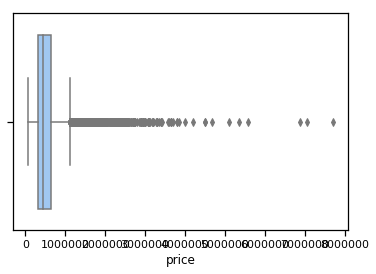

In [21]:
sns.boxplot(x=df['price']);

#### Answer:
Homes above ~$1.25MM look to fall outside of the normal data distribution

In [22]:
len(df[df['price'] > 1638000])/len(df['price'])

0.01901016060308096

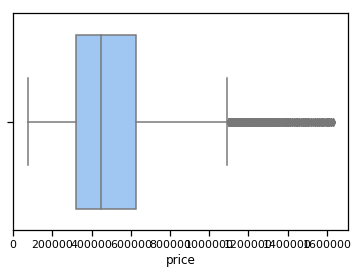

In [23]:
df = df[df['price'] <= 1638000] #mean + 3 stds ~=$1,638,000
sns.boxplot(x=df['price']);

In [24]:
df = df[df['bedrooms'] <= 7] #mean + 3 stds ~=6.13, round up to 7 since you can't have a half bedroom
df = df[df['bathrooms'] <= 4.5] #mean + 3 stds ~= 4.4, round up to 4.5 since you can have a half bath
df = df[df['sqft_living'] <= 4840] #mean + 3 stds ~=4,840
df = df[df['sqft_above'] <= 4275] #mean + 3 stds ~=4,275
df = df[df['sqft_lot'] <= 140000] #mean + 3 stds ~=140,000
df = df[df['sqft_basement'] <= 1620] #mean + 3 stds ~=1,620

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20296 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             20296 non-null datetime64[ns]
price            20296 non-null float64
bedrooms         20296 non-null int64
bathrooms        20296 non-null float64
sqft_living      20296 non-null int64
sqft_lot         20296 non-null int64
floors           20296 non-null float64
waterfront       20296 non-null category
view             20296 non-null float64
condition        20296 non-null int64
grade            20296 non-null int64
sqft_above       20296 non-null int64
sqft_basement    20296 non-null int32
yr_built         20296 non-null int64
zipcode          20296 non-null category
lat              20296 non-null float64
long             20296 non-null float64
sqft_living15    20296 non-null int64
sqft_lot15       20296 non-null int64
month            20296 non-null int64
dtypes: category(2), datetime64[ns](1), float64(6), int32(1), int64(10)
memory usage: 2.9 

In [26]:
df.describe()

price      bedrooms     bathrooms   sqft_living       sqft_lot  \
count  2.029600e+04  20296.000000  20296.000000  20296.000000   20296.000000   
mean   4.967391e+05      3.332824      2.062562   1983.813609   10578.778922   
std    2.482285e+05      0.866922      0.707821    763.501866   13400.921524   
min    7.800000e+04      1.000000      0.500000    370.000000     520.000000   
25%    3.160000e+05      3.000000      1.500000   1410.000000    5000.000000   
50%    4.400000e+05      3.000000      2.250000   1870.000000    7455.500000   
75%    6.165000e+05      4.000000      2.500000   2460.000000   10136.000000   
max    1.630000e+06      7.000000      4.500000   4820.000000  139392.000000   

             floors          view     condition         grade    sqft_above  \
count  20296.000000  20296.000000  20296.000000  20296.000000  20296.000000   
mean       1.485490      0.189101      3.411066      7.566860   1715.806514   
std        0.539496      0.676871      0.648894      1.062364    720.546819   
min        1.000000      0.000000      1.000000      3.000000    370.000000   
25%        1.000000      0.000000      3.000000      7.000000   1180.000000   
50%        1.000000      0.000000      3.000000      7.000000   1530.000000   
75%        2.000000      0.000000      4.000000      8.000000   2120.000000   
max        3.500000      4.000000      5.000000     12.000000   4270.000000   

       sqft_basement      yr_built           lat          long  sqft_living15  \
count   20296.000000  20296.000000  20296.000000  20296.000000   20296.000000   
mean      268.007095   1970.641801     47.560081   -122.217281    1934.473246   
std       399.056451     29.406644      0.138966      0.139165     626.096461   
min         0.000000   1900.000000     47.155900   -122.512000     399.000000   
25%         0.000000   1951.000000     47.469800   -122.331000    1470.000000   
50%         0.000000   1974.000000     47.570900   -122.237000    1810.000000   
75%       530.000000   1996.000000     47.679500   -122.129000    2300.000000   
max      1620.000000   2015.000000     47.777600   -121.315000    5790.000000   

          sqft_lot15         month  
count   20296.000000  20296.000000  
mean    10221.487091      6.592284  
std     15746.043378      3.104322  
min       651.000000      1.000000  
25%      5001.000000      4.000000  
50%      7500.000000      6.000000  
75%      9756.250000      9.000000  
max    434728.000000     12.000000

Some quick research shows that a higher grade signifies a higher grade building material and therefore would be a more expensive build. I will not make grade categorical.

# Initial Modeling

It is time to start to vizualize the data to understand how the variables interact with one another. The three assumptions I want to look for are:
- Is there a linear relationship between the independent and dependent variables?
- Is there a normal distribution of risiduals?
- Are variables distributed equally along a regression line?

#### Question:
What is the distrubution of the cleaned data?

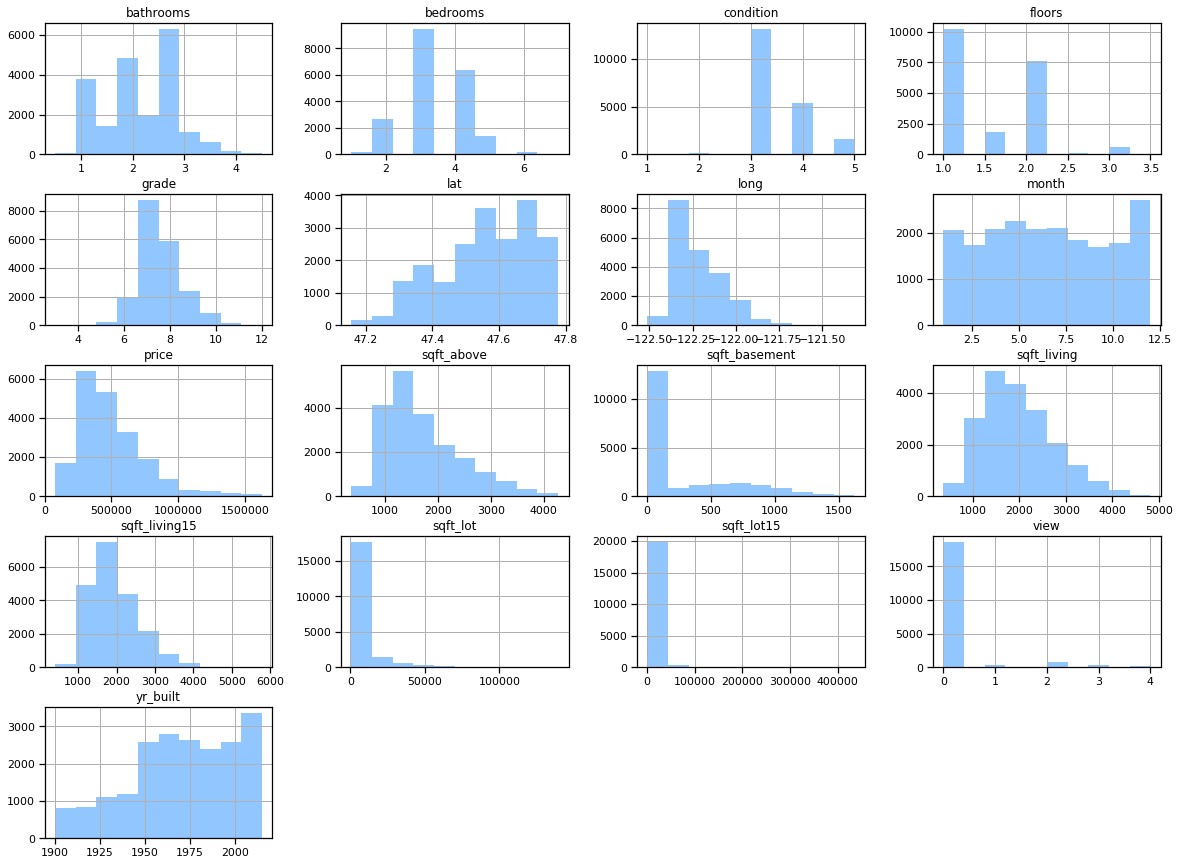

In [27]:
df.hist(figsize=(20,15));

#### Answer:
Some are fairly normally distributed. Others, like lat and long, are not quite as normal.

Select some of the more normal features

In [28]:
data = df[['bathrooms', 'bedrooms', 'condition', 'grade', 'price', 'sqft_above', 'sqft_living', 'sqft_living15']]

Check for linearity

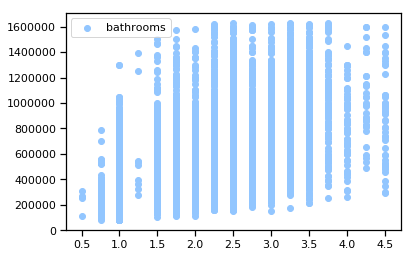

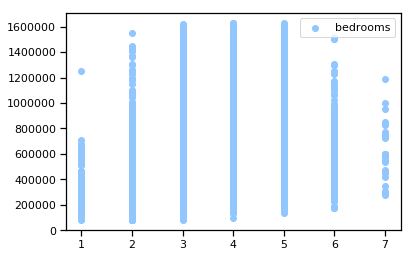

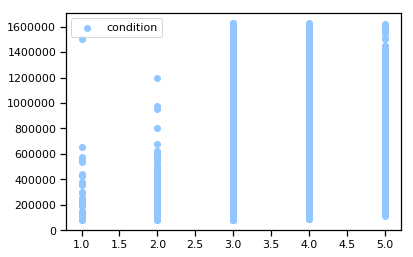

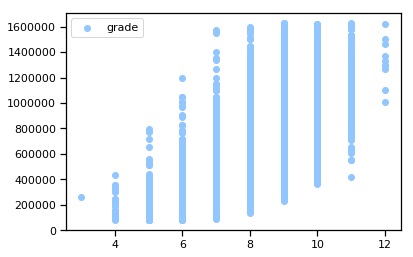

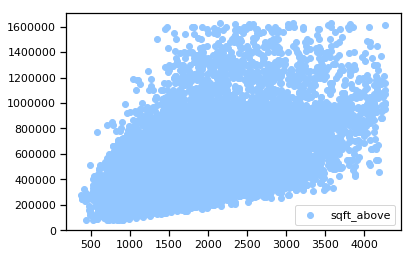

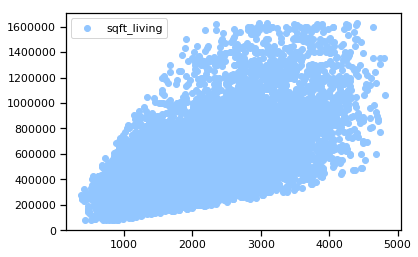

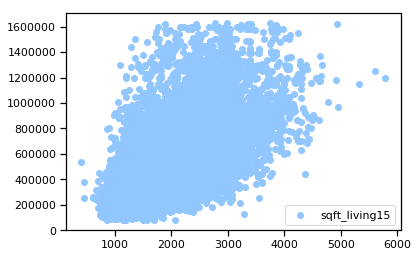

In [29]:
columns = data.drop('price', axis=1)
for x in columns:
    plt.scatter(columns[x], data.price, label=x)
    plt.legend()
    plt.show()

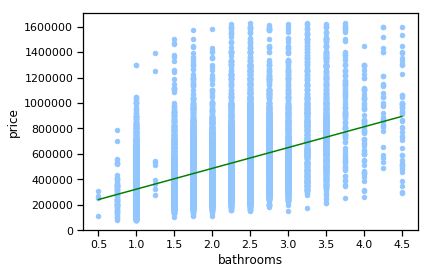

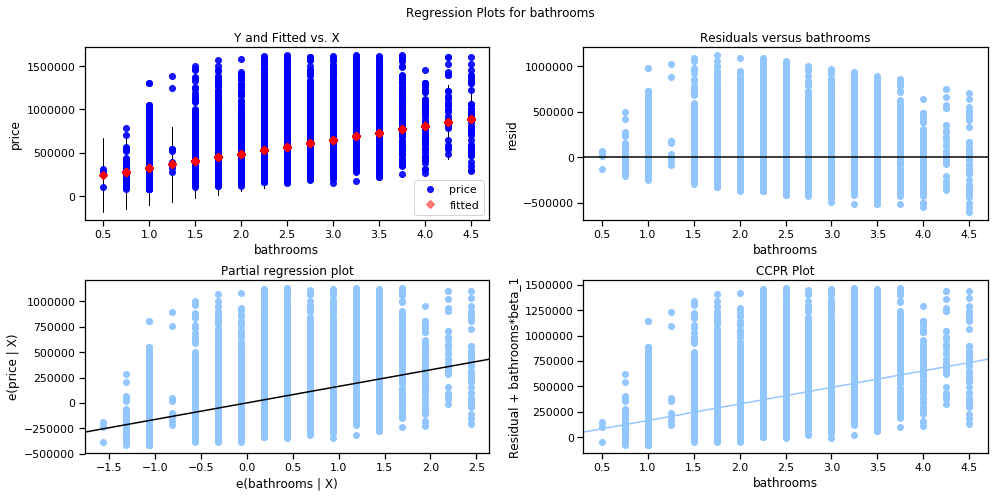

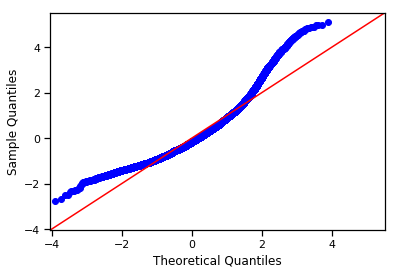

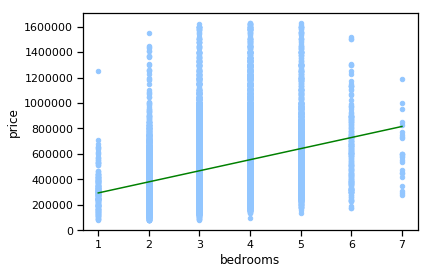

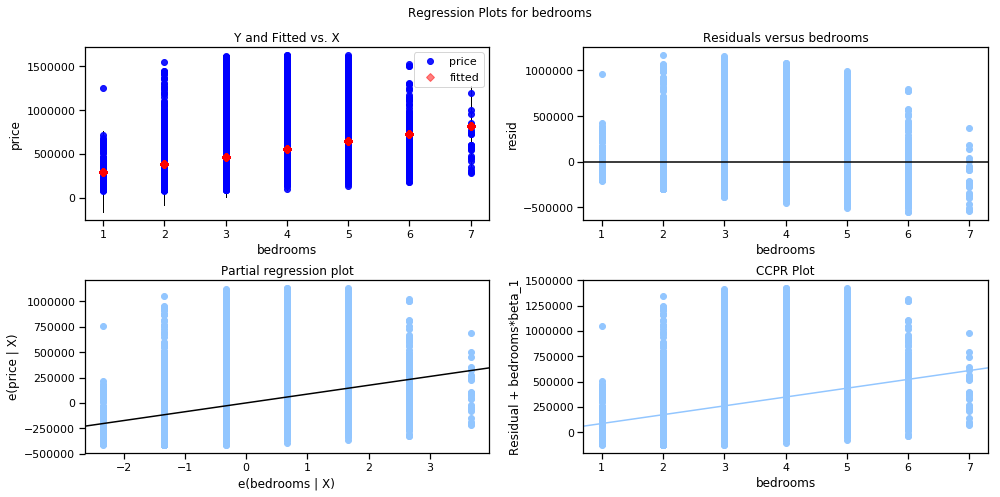

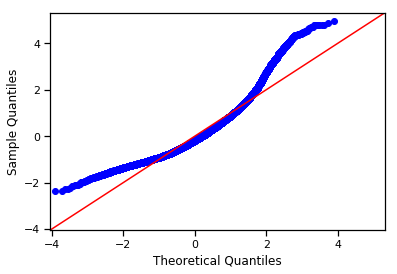

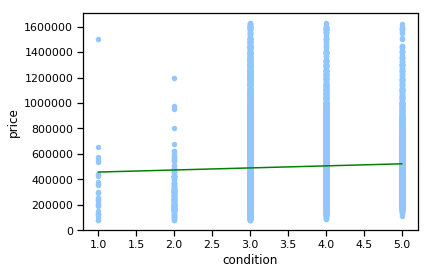

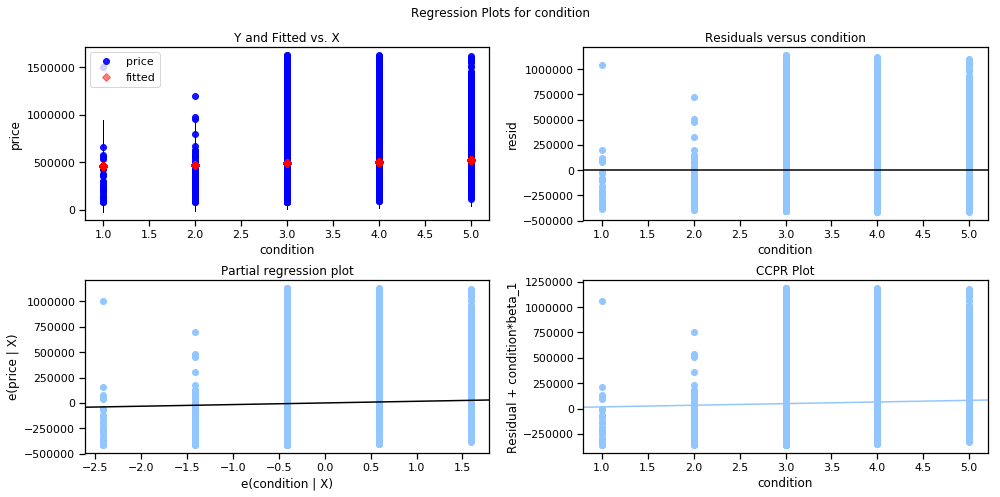

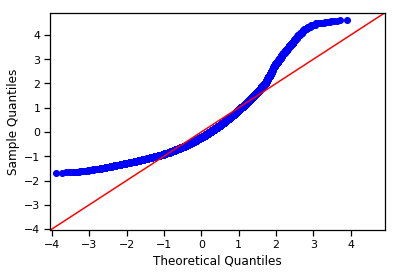

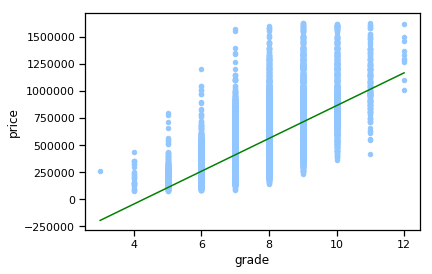

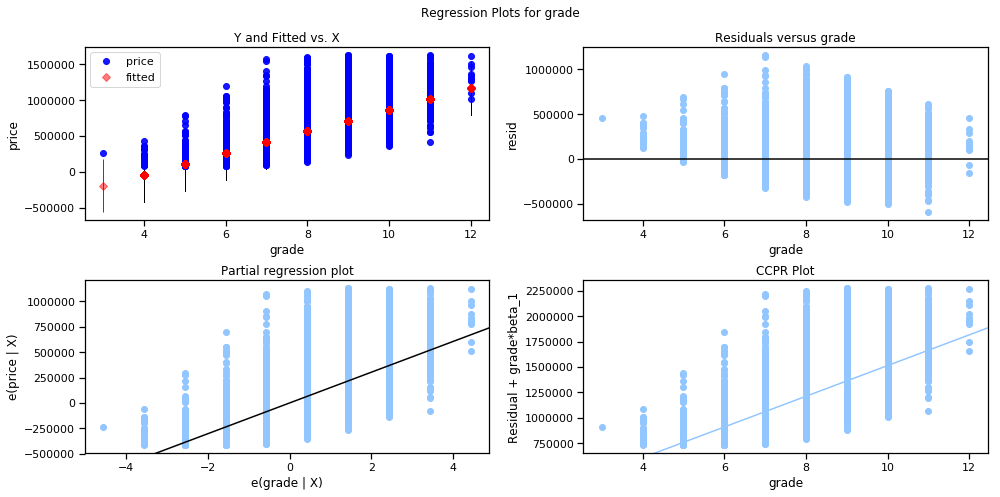

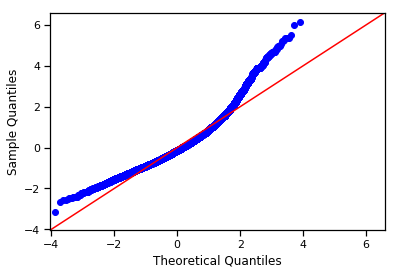

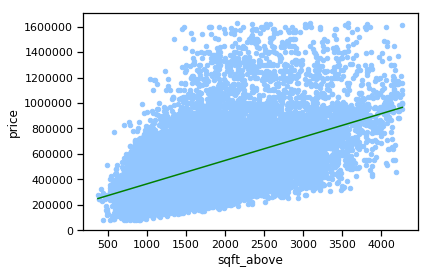

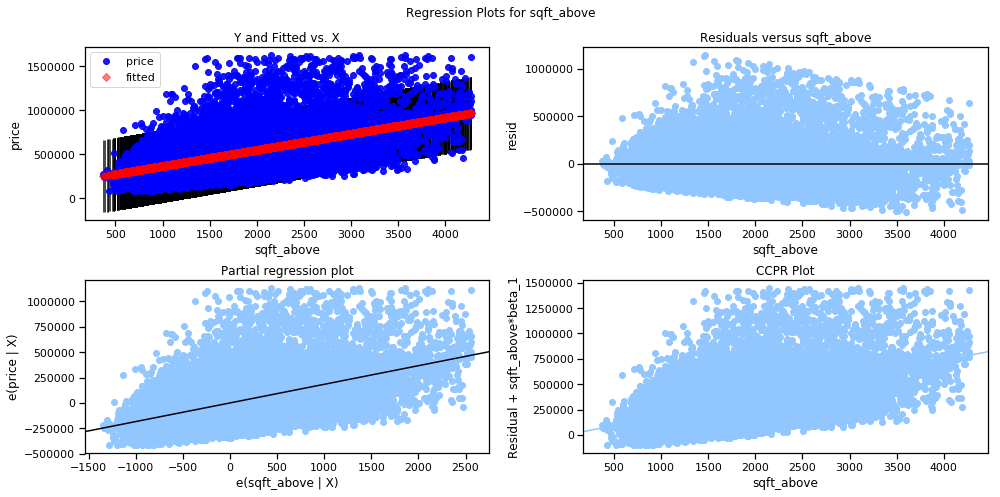

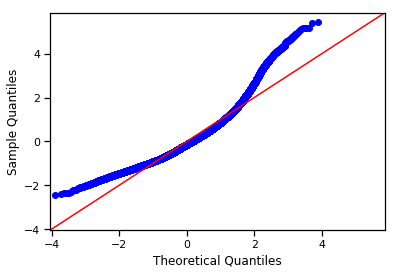

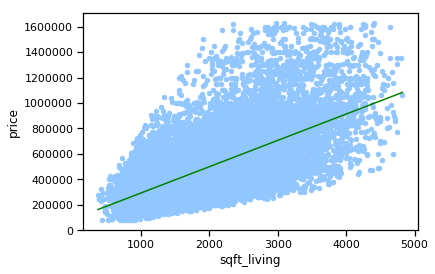

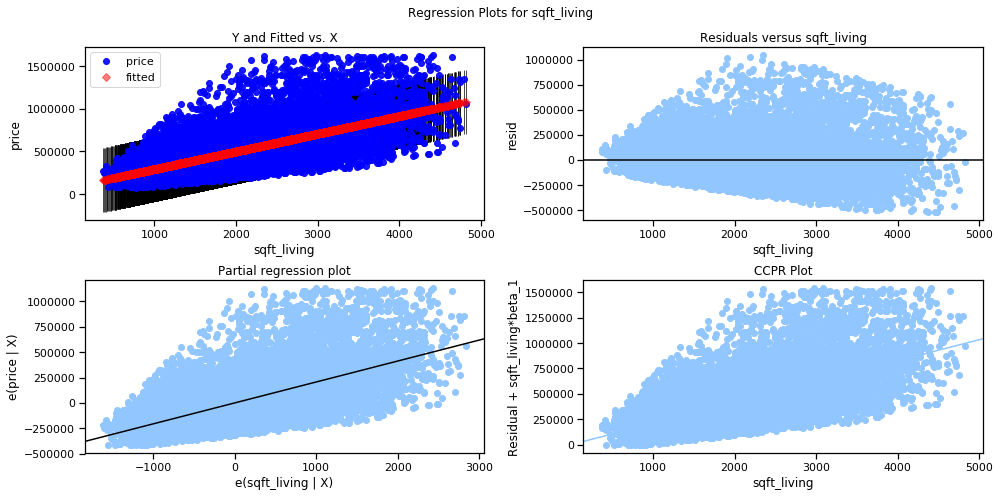

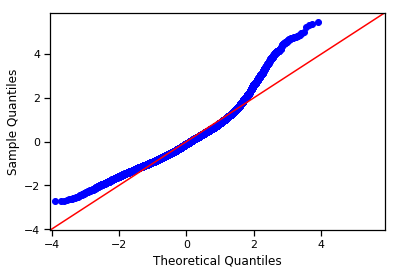

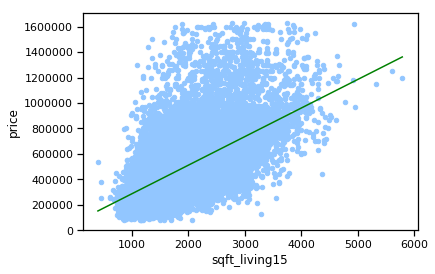

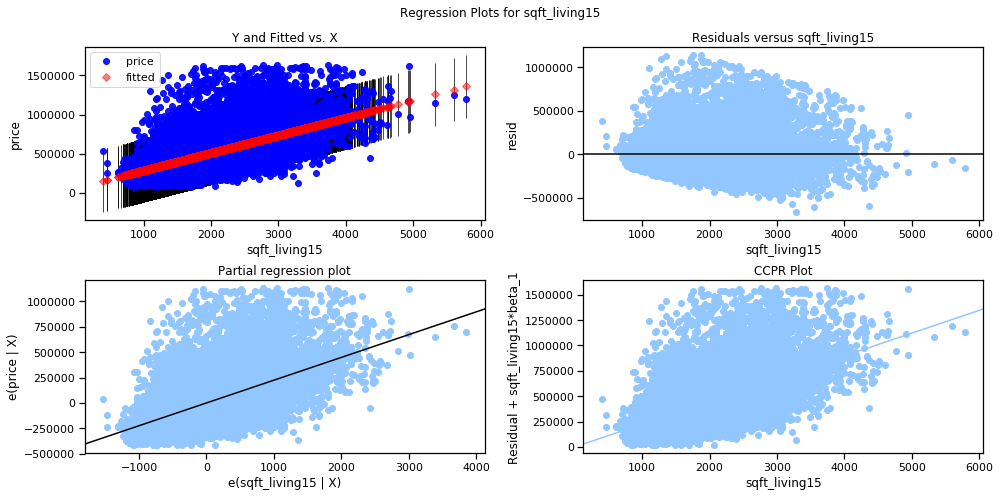

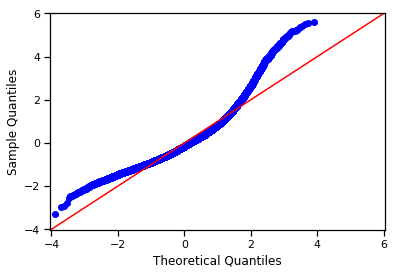

In [30]:
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)']]
for idx, val in enumerate(data.drop(['price'], axis=1).columns):
    f = 'price~' + val
    model = smf.ols(formula=f, data=data).fit()
    X_new = pd.DataFrame({val: [data[val].min(), data[val].max()]});
    preds = model.predict(X_new)
    data.plot(kind='scatter', x=val, y='price');
    plt.plot(X_new, preds, c='green')
    plt.show()
    fig = plt.figure(figsize=(14,7))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    plt.show()
    results.append([val, model.rsquared, model.params[0],model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])

Quick analysis:
- Bathrooms - positively related to price. No clear heteroskedasticity. The QQ plot shows that residuals are not very normally distributed.
- Bedrooms - positively related to price. Slight heteroskedasticity - more likely to have negative error with more bedrooms and vice versa. The residuals are not normally distributed.
- Condition - Slight positive relationship with price. Significnat heteroskedastic, but important to remember there are few (~1%) of homes in the 1 or 2 bin. QQ plot shows a thin left tail which hurts normality.
- Grade - appears to be a strong positive relationship between grade and price. There is a lack of homoskedasticity. The QQ plot shows some right skew to the data.
- Sqft_above - positive relationship to price. Fairly homoskedastic. Normality is questionable, a log transformtion could be helpful.
- Sqft_living - positive relationship to price. Some heteroskedasticity - there is more variance as the independent variable approaches the mean. Relatively normal in the QQ plot, with some right skew.
- Sqft_living15 - positive relationship with price. The residuals are heteroskedastic. Normality is far from perfect.

#### Question:
How related are the independent variables to each other? In other words, what is the multicolinearity of the variables?

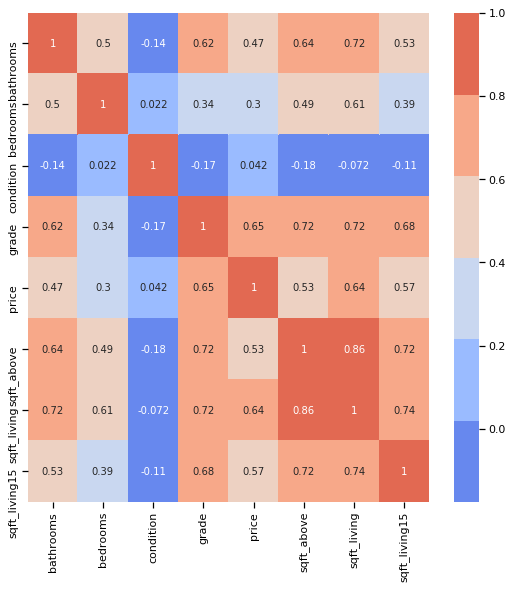

In [31]:
corr = data.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr, annot=True, cmap=sns.color_palette('coolwarm'))
plt.show()

#### Answer:
Sqft_living seems to have the highest colinearity with other variables, and has correlation with other variables > 0.75. I will remove it and run the heat map a second time.

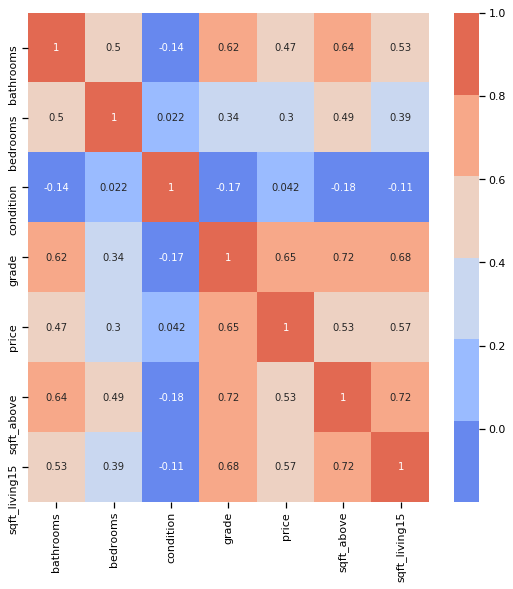

In [32]:
data = data.drop(['sqft_living'], axis=1)
corr = data.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr, annot=True, cmap=sns.color_palette('coolwarm'))
plt.show()

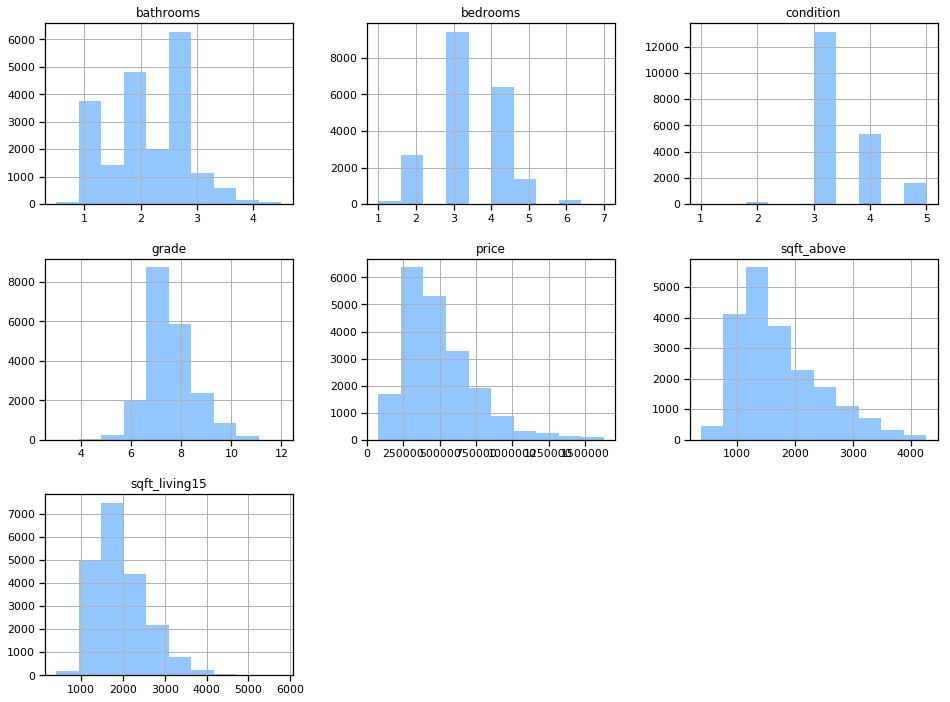

In [33]:
data.hist(figsize=(16,12));

I will now run a mulitvariate regression model to see how the data impact each other

In [34]:
outcome = 'price'
x_cols = data.drop(['price'],axis=1).columns

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     3061.
Date:                Wed, 28 Aug 2019   Prob (F-statistic):               0.00
Time:                        10:04:56   Log-Likelihood:            -2.7438e+05
No. Observations:               20296   AIC:                         5.488e+05
Df Residuals:                   20289   BIC:                         5.488e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.705e+05   1.35e+04    -57.052      0.000   -7.97e+05   -7.44e+05
bathrooms      1.958e+04   2565.278      7.632      0.000    1.45e+04    2.46e+04
bedrooms       4144.5665   1772.089      2.339      0.019     671.128    7618.005
condition       5.97e+04   2000.204     29.848      0.000    5.58e+04    6.36e+04
grade          1.102e+05   1901.447     57.976      0.000    1.07e+05    1.14e+05
sqft_above       11.9501      3.052      3.915      0.000       5.968      17.932
sqft_living15    80.0088      3.100     25.806      0.000      73.932      86.086
==============================================================================
Omnibus:                     3913.045   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9352.838
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       5.523   Cond. No.                     2.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train and test

In [35]:
y = data[['price']]
X = data.drop(['price'], axis=1)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

16236 4060 16236 4060


In [37]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = np.sum((y_train - y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test - y_hat_test)**2)/len(y_test)
print('Train Mean Sq Err:', mse_train)
print('Test Mean Sq Err:', mse_test)

Train Mean Sq Err: price    3.268322e+10
dtype: float64
Test Mean Sq Err: price    3.097403e+10
dtype: float64


# Feature Engineering and building a better predictive model

Use data transformations to build a better model

In [38]:
price = np.log(data.price)
bathrooms = data.bathrooms
bedrooms = data.bedrooms
condition = data.condition
grade = data.grade
sqft_above = np.log(data['sqft_above'])
sqft_living15 = np.log(data.sqft_living15)

data_final = pd.DataFrame([])
data_final['price'] = price
data_final['bathrooms'] = bathrooms
data_final['bedrooms'] = bedrooms
data_final['condition'] = condition
data_final['grade'] = grade
data_final['sqft_above'] = sqft_above
data_final['sqft_living15'] = sqft_living15

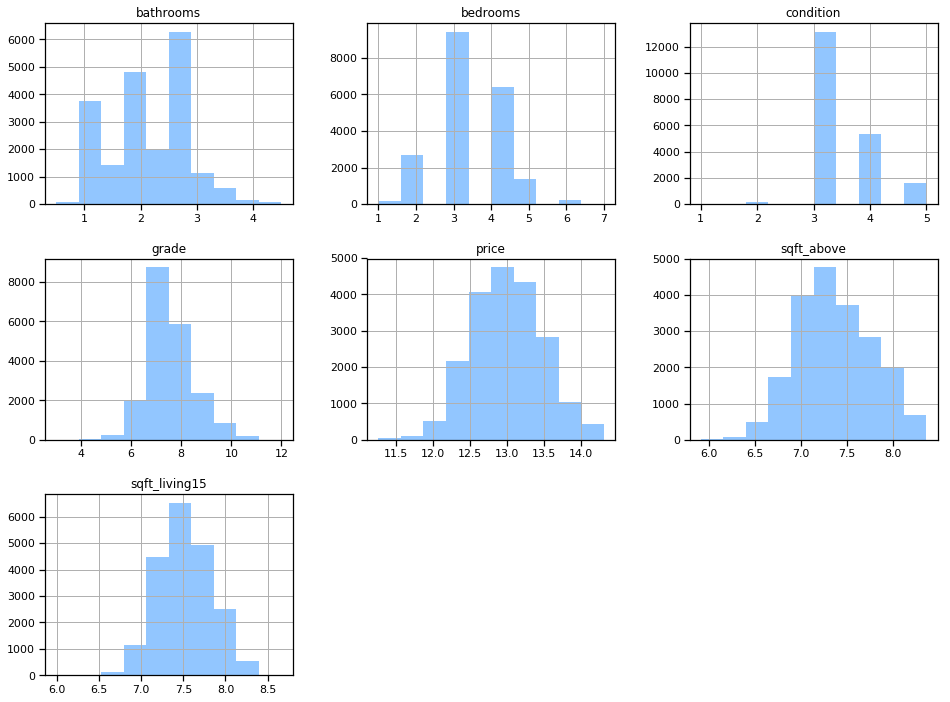

In [39]:
data_final.hist(figsize=(16,12));

In [40]:
outcome = 'price'
x_cols = data_final.drop(['price'],axis=1).columns

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     3101.
Date:                Wed, 28 Aug 2019   Prob (F-statistic):               0.00
Time:                        10:04:57   Log-Likelihood:                -7104.3
No. Observations:               20296   AIC:                         1.422e+04
Df Residuals:                   20289   BIC:                         1.428e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.4883      0.077    110.733      0.000       8.338       8.639
bathrooms         0.0568      0.005     11.472      0.000       0.047       0.066
bedrooms          0.0121      0.003      3.518      0.000       0.005       0.019
condition         0.1097      0.004     28.781      0.000       0.102       0.117
grade             0.2129      0.004     59.641      0.000       0.206       0.220
sqft_above        0.0021      0.010      0.200      0.841      -0.018       0.022
sqft_living15     0.3134      0.011     27.472      0.000       0.291       0.336
==============================================================================
Omnibus:                       26.781   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.181
Skew:                           0.025   Prob(JB):                     9.25e-06
Kurtosis:                       2.842   Cond. No.                         449.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I am using code from the lesson to optimize using stepwise selection with p-values:

In [41]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [42]:
columns = data_final.drop(['price'], axis=1)
result = stepwise_selection(columns, data_final.price, verbose = True)
print('resulting features:')
print(result)

Add  bedrooms                       with p-value 0.0
Add  grade                          with p-value 0.0
Add  sqft_living15                  with p-value 2.38724e-196
Add  condition                      with p-value 5.93685e-168
Add  bathrooms                      with p-value 2.17648e-32
resulting features:
['bedrooms', 'grade', 'sqft_living15', 'condition', 'bathrooms']


The stepwise selection optimizes the model without the sqft_above independent variable, which could have been anticipated, given the p-value of .841 in our regression model. The p-values provided are all statistically significant at the 95% confidence interval

Final regression:

In [43]:
data_final = data_final.drop(['sqft_above'], axis=1)

outcome = 'price'
x_cols = data_final.drop(['price'],axis=1).columns

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     3722.
Date:                Wed, 28 Aug 2019   Prob (F-statistic):               0.00
Time:                        10:04:58   Log-Likelihood:                -7104.3
No. Observations:               20296   AIC:                         1.422e+04
Df Residuals:                   20290   BIC:                         1.427e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.4949      0.069    122.936      0.000       8.359       8.630
bathrooms         0.0570      0.005     11.870      0.000       0.048       0.066
bedrooms          0.0123      0.003      3.714      0.000       0.006       0.019
condition         0.1096      0.004     28.887      0.000       0.102       0.117
grade             0.2132      0.003     63.676      0.000       0.207       0.220
sqft_living15     0.3142      0.011     29.341      0.000       0.293       0.335
==============================================================================
Omnibus:                       26.472   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.942
Skew:                           0.025   Prob(JB):                     1.04e-05
Kurtosis:                       2.843   Cond. No.                         346.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
y = data_final[['price']]
X = data_final.drop(['price'], axis=1)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

16236 4060 16236 4060


In [46]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = np.sum((y_train - y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test - y_hat_test)**2)/len(y_test)
print('Train Mean Sq Err:', mse_train)
print('Test Mean Sq Err:', mse_test)

Train Mean Sq Err: price    0.117802
dtype: float64
Test Mean Sq Err: price    0.118423
dtype: float64


#### Analysis

47.8 percent of the variance in the dependent variable 'price' can be explained by the independent variables. The math equation for the regression is:

ln(price) = 8.4949 + .057(bathrooms) + .012(bedrooms) + .11(condition) + .213(grade) + .314(ln(sqft_living15))

Each of the following statements describing impact of change in an independent variable assumes all other variables are held constant.
- In real dollar terms, the intercept is ~$4,900
- For each additional full bathroom a home has, price will increase by 5.7%.
- Every additional bedroom added to a home drives the price up 1.23%.
- Home price increases almost 11% for each additional point of condition above 0.
- As material (grade) of the home is improved by one unit of measure, the sell price of the home jumps 21.3%.
- A 1% increase in living space of a home measured in 2015 (sqft_living15) leads to a .31% increase in price, holding all other variables constant.

A full example of this would be calculating price for a 2,000 sqft, 2 bed, 2 bath house, built with grade = 7, in condition = 3 could be estimated to be ln(price) = 12.8403 which approximates to a sale price of $377,188. For comparison, if we increase the number of bathrooms to 3, holding all other variables constant, we get a sale price of 381,780 which is an increase of approx. 1.22%.

The difference in MSE between the train and test models was ~1.3%

- Train Mean Sq Err: price    0.11822
- dtype: float64
- Test Mean Sq Err: price    0.116747
- dtype: float64

# Data Visualization

Generating meaningful views for the business presentation. I can still use the 'df' dataframe to split the data, since no information was dropped post-cleaning.

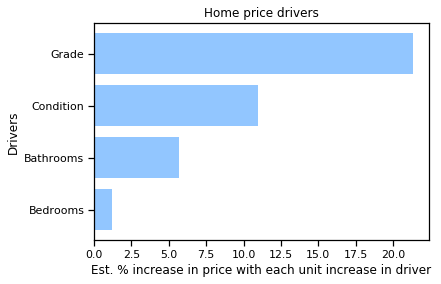

In [47]:
x = [1.23, 5.7, 10.96, 21.32]
bars = ('Bedrooms', 'Bathrooms', 'Condition', 'Grade')
ypos = np.arange(len(bars))

plt.barh(ypos, x)
plt.yticks(ypos, bars)
plt.title('Home price drivers')
plt.xlabel('Est. % increase in price with each unit increase in driver')
plt.ylabel('Drivers')
plt.savefig('drivers.png')
plt.show()

In [48]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month'],
      dtype='object')

In [49]:
zipdf = df.drop(['date', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'sqft_above',
                 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_lot15', 'month'], axis=1)
zipc = zipdf.groupby('zipcode').mean()
x = pd.DataFrame(round(zipc.nlargest(5, 'price'),2))
y = pd.DataFrame(round(zipc.nsmallest(5, 'price'),2))
x = x.reset_index()
y = y.reset_index()

In [50]:
import plotly.graph_objects as go

In [51]:
fig = go.Figure(data=[go.Table(header=dict(values=['Zip Code', 'Home Price', 'Bedrooms', 'Bathrooms', 
                                                   'Home Condition', 'Material Grade', 'Sqft of living space']),
                 cells=dict(values=[x['zipcode'], x['price'], x['bedrooms'], x['bathrooms'], 
                                    x['condition'], x['grade'], x['sqft_living15']]))
                     ])
fig.show()

In [52]:
fig = go.Figure(data=[go.Table(header=dict(values=['Zip Code', 'Home Price', 'Bedrooms', 'Bathrooms', 
                                                   'Home Condition', 'Material Grade', 'Sqft of living space']),
                 cells=dict(values=[y['zipcode'], y['price'], y['bedrooms'], y['bathrooms'], 
                                    y['condition'], y['grade'], y['sqft_living15']]))
                     ])
fig.show()

I want to use the small df (n=343) of duplicated homes to see what the YOY resale price was. The sample size is large enough (n>20) that I feel comfortable using this as a representative population for resale analysis.

In [53]:
id_duplicates = id_duplicates.sort_values(by=['id', 'date'])

In [54]:
id_duplicates = id_duplicates.drop(['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'month'], axis=1)

In [55]:
id_duplicates_first = id_duplicates.drop_duplicates('id', keep='first')
id_duplicates_last = id_duplicates.drop_duplicates('id', keep='last')
id_duplicates_delta = pd.merge(id_duplicates_first, id_duplicates_last, how='inner', on='id')
id_duplicates_delta['price'] = id_duplicates_delta['price_y'] - id_duplicates_delta['price_x']
round(id_duplicates_delta.price.mean(),2)

136567.62

I want to group the data by month and avg price and recommend a time of year to buy/sell.

In [56]:
df_month = df.groupby('month').mean()

In [57]:
df_month = df_month.drop(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)

x = pd.DataFrame(round(df_month.nlargest(3, 'price'),2))
y = pd.DataFrame(round(df_month.nsmallest(3, 'price'),2))

In [58]:
import plotly.graph_objects as go
import numpy as np

x = df_month.index
y = df_month.price

fig = go.Figure(data=go.Scatter(x=x, y=y))

fig.update_layout(
    title=go.layout.Title(
        text="Average Home Sale Price by Month",
        xref="paper",
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Month",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Avg sale price",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )
)

fig.show()

--End of code--

I was trying to make a map with the highest and lowest priced zipcodes but ultimately ran out of time.

In [59]:
#import folium
#import json
#from folium import plugins

In [60]:
#zipdf2 = df.drop(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
                  #'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15',
                  #'sqft_lot15', 'month'], axis=1)
#zipc = zipdf2.groupby('zipcode').mean()
#x = pd.DataFrame(round(zipc.nlargest(5, 'price'),2))
#y = pd.DataFrame(round(zipc.nsmallest(5, 'price'),2))
#x = x.reset_index()
#y = y.reset_index()
#y = y.sort_values('price', ascending=False)

In [61]:
#high_and_low = pd.concat([x,y], ignore_index=True)
#high_and_low

In [62]:
#pricehl = pd.DataFrame()
#pricehl['zipcode'] = [str(i) for i in high_and_low.zipcode]
#pricehl['price'] = high_and_low.price

In [63]:
#with open('Zip_Codes.geojson') as f:
    #KCArea = json.load(f)

In [64]:
#KCMap = folium.Map(location=[47.5480,-121.9836], tiles='Stamen Toner', zoom_start=9)

#KCMap.choropleth(geo_path='Zip_Codes.geojson', data=pricehl, columns=['zipcode', 'price'],
                 #key_on='feature.properites.zipcode', fill_color='YlGn', fill_opacity=1)